# Initialisations

In [3]:
import pandas as pd ; pd.set_option('display.max_columns', 500)
import numpy as np
from numpy import random ; random.RandomState(seed = 69)

from sklearn.model_selection import train_test_split

from sklearn import ensemble #gradientboosting
from sklearn import linear_model #lasso
from sklearn import tree #decision tree

from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import ipywidgets as widgets

# DRAGON descriptors
## Bringing in data and splitting it into parts

In [22]:
csv = pd.read_csv('filtered_organics_desc_kh.csv') # contains VP/AS HLCs

print(csv.shape) #input shape

csv.dropna(axis=0, inplace=True)

print(csv.shape) #removed NaN shape

species_names = csv.pop('0')
smiles_strings = csv.pop('Unnamed: 0')
constants_mean = csv.pop('Kh_mean')
constants_first = csv.pop('Kh_first')

varying_columns = csv[['Varying_1', 'Varying_2', 'Varying_3', 'Varying_4',
 'Varying_5', 'Varying_6', 'Varying_7', 'Varying_8', 'Varying_9']] # popping one-hot encoding columns

dragon_features = csv.drop(['Varying_1', 'Varying_2', 'Varying_3', 'Varying_4',
 'Varying_5', 'Varying_6', 'Varying_7', 'Varying_8', 'Varying_9'], axis=1) #seperating features

(2075, 1480)
(2068, 1480)


In [25]:
X = dragon_features ; y = constants_first #renaming to X and y for use in models

## Feature Selection
Made aware of features selection methods in scikitlearn via https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

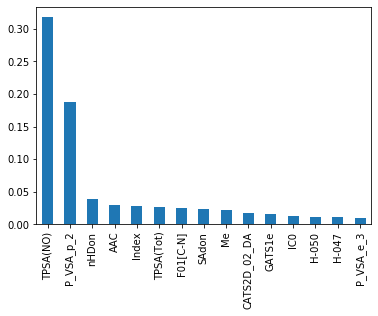

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
fs_model = GradientBoostingRegressor()
fs_model.fit(X, y)
importances = pd.Series(fs_model.feature_importances_, index = X.columns)
importances.nlargest(15).plot(kind='bar')
plt.show()
top_15_features = list(importances.nlargest(15).index.values)

In [58]:
len(list(X))

1467

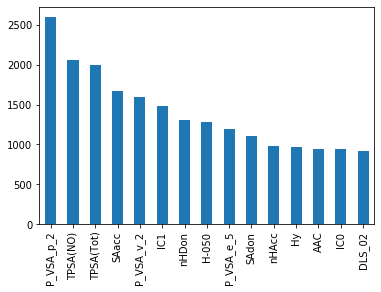

In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

fs_kbest = SelectKBest(score_func= f_regression, k=15)
fit = fs_kbest.fit(X, y)
scores = pd.Series(fit.scores_, index=X.columns)
scores.nlargest(15).plot(kind='bar')

## GradientBoosting
Using grid search to find ideal hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)